# [Quadratic Primes](https://projecteuler.net/problem=27)

Couple of observations to speed up iterating through values of $a$ and $b$:
1. $0^2 + 0a + b = b$ must be prime. Additionally, since $|b| \leq 1000$, the largest possible value for $b$ is 997.
2. $1^2 + 1a + b = 1 + a + b$ must be prime. Therefore $a = p - b - 1$ for some prime $p$. Furthermore, since $|a| < 1000$, it follows that $-1000 < p - b - 1 < 1000 \implies b - 999 < p < b + 1001$, so $p$ must be less than $997 + 1001 = 1998$ in the most extreme case.

These facts allows us to iterate over just prime numbers instead of the larger range of integers.

In [1]:
from itertools import count

def consecutive_primes(a, b):
    f = lambda x: x^2 + a*x + b
    for n in count(0):
        if not is_prime(f(n)):
            return n


coeffs = dict()
primes = prime_range(2000)
for b in primes:
    if b > 1000:
        break
        
    for p in primes:
        a = p - b - 1
        if not (abs(a) < 1000):
            break
            
        coeffs[(a, b)] = consecutive_primes(a, b)

a, b = max(coeffs, key=coeffs.get)
print(a * b)

-59231


It's worth noting that the coefficients end up being $a=-61$ and $b=971$. If you iterate through $n=0,1,2,\ldots$ for the resulting quadratic and the other formula given, $n^2 - 79n + 1601$, you'll see that these polynomials don't actually generate any new prime numbers compared to Euler's formula - they just repeat primes that Euler's formula already gives.

Furthermore, both of these polynomials are actually just shifts of Euler's formula:
$$n^2 - 61n + 971 = (n-31)^2 + (n-31) + 41$$
$$n^2 - 79n + 1601 = (n-40)^2 + (n-40) + 41$$

What's going on? Let $f(n) = n^2 + n + 41$. An interesting property of [prime-generating functions](https://mathworld.wolfram.com/Prime-GeneratingPolynomial.html) is if $p(n)$ generates primes for $0 \leq n \leq u$, then $p(u - n)$ also will. To understand why, try evaluating $p(u-n)$ at $n=0,1,2,\ldots,u$; you get $p(u),p(u-1),p(u-2),\ldots,p(0)$, which are the same values given by $p(n)$, just in reverse.

However, that property alone doesn't explain why shifting $f$ right generates *more* (non-distinct) primes than $f(n)$. To understand that aspect, let's look at a plot of $f(n)$.

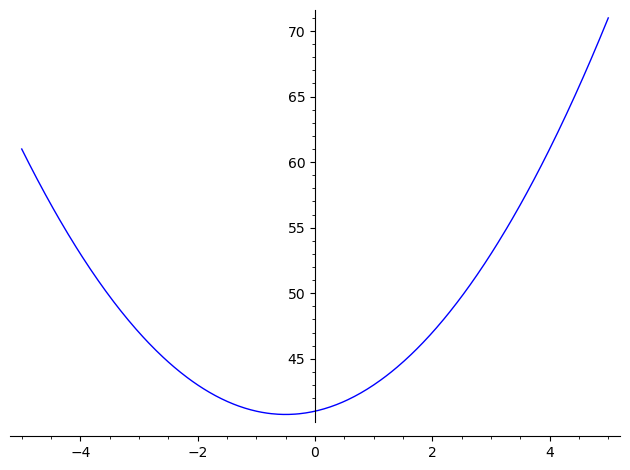

In [2]:
f(n) = n^2 + n + 41
plot(f, (-5, 5))

This quadratic is symmetric across $x=-0.5$. Because of this, $f(-1) = f(0)$, $f(-2) = f(1)$, and so on; in general, $f(n) = f(-1-n)$. However, since the axis of symmetry is just to the left of the $y$-axis, when we iterate through $n=0,1,2,\ldots$, we only output values on one side of the axis, so we don't output any duplicated values.

But when we transform this function by shifting it $k$ units to the right, $f(n - k)$, we cause the part of the function that's left of the axis of symmetry to *also* be output when we iterate through $n=0,1,2,\ldots$. Since these values are all equal to values we were already outputting, they'll also be prime, but they won't be *new* primes. Since $f$ outputs primes from $n=0$ to $39$ (40 distinct values), we can shift it up to 40 units to the right and have every value from $n=0$ to $79$ be prime.

Because of the symmetry of $f$, the transformation $f(u-n)$ is actually the *same* as shifting $f$ to the right $u+1$ units (this can be shown algebraically); then, after outputting the primes in reverse, the vertex is reached and the function starts increasing again, repeating the primes that were already output.

## Relevant sequences
* Primes generated by Euler's formula: [A005846](https://oeis.org/A005846)